In [3]:
import torch
import torch.nn as nn
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt

In [2]:
class NullModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1,1)
    

model = NullModule()
optimizer = torch.optim.Adam(model.parameters())

def plot_lr(scheduler, step=100):
    lrs = []
    for i in range(step):
        lr = optimizer.param_groups[0]['lr']
        scheduler.step()
        lrs.append(lr)

    plt.plot(lrs)
    plt.show()



/home/user/micromamba/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


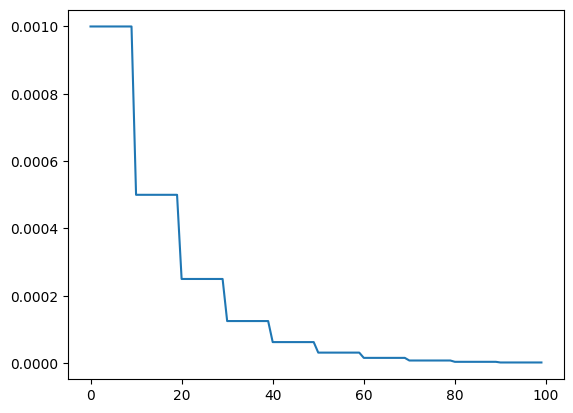

In [4]:
STP = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
plot_lr(STP)

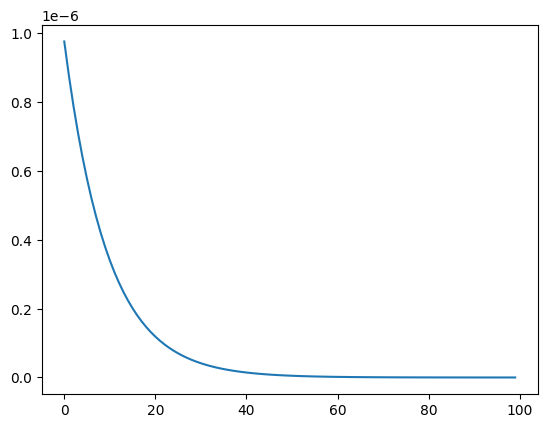

In [5]:
EXP = lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

plot_lr(EXP)


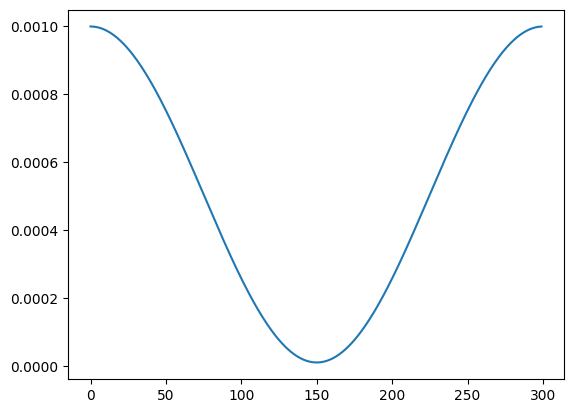

In [9]:
CA = lr_scheduler.CosineAnnealingLR(optimizer, T_max=150, eta_min=1e-5)

plot_lr(CA, step=300)


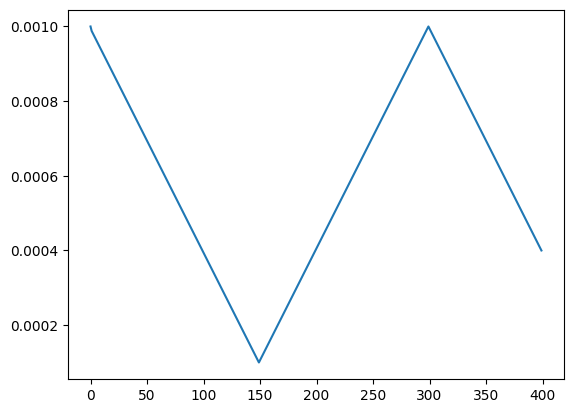

In [14]:
Cyc = lr_scheduler.CyclicLR(optimizer, step_size_up=150, base_lr=1e-4, max_lr=0.001, cycle_momentum=False, 
                           last_epoch=150)

plot_lr(Cyc, 400)

In [39]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    initial_lr: 0.001
    lr: 0.00019061367187499996
    maximize: False
    weight_decay: 0
)

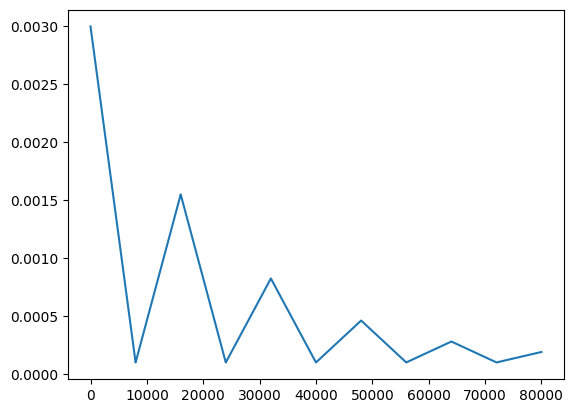

In [38]:
Cyc = lr_scheduler.CyclicLR(optimizer, step_size_up=8000, base_lr=1e-4, 
                            max_lr=0.003, cycle_momentum=False, 
                            mode="triangular2", 
                           last_epoch=8000)

plot_lr(Cyc, 80000)

In [35]:
lr_scheduler.CosineAnnealingWarmRestarts?

Init signature:
lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer,
    T_0,
    T_mult=1,
    eta_min=0,
    last_epoch=-1,
    verbose=False,
)
Docstring:     
Set the learning rate of each parameter group using a cosine annealing
schedule, where :math:`\eta_{max}` is set to the initial lr, :math:`T_{cur}`
is the number of epochs since the last restart and :math:`T_{i}` is the number
of epochs between two warm restarts in SGDR:

.. math::
    \eta_t = \eta_{min} + \frac{1}{2}(\eta_{max} - \eta_{min})\left(1 +
    \cos\left(\frac{T_{cur}}{T_{i}}\pi\right)\right)

When :math:`T_{cur}=T_{i}`, set :math:`\eta_t = \eta_{min}`.
When :math:`T_{cur}=0` after restart, set :math:`\eta_t=\eta_{max}`.

It has been proposed in
`SGDR: Stochastic Gradient Descent with Warm Restarts`_.

Args:
    optimizer (Optimizer): Wrapped optimizer.
    T_0 (int): Number of iterations for the first restart.
    T_mult (int, optional): A factor increases :math:`T_{i}` after a restart. Default: 1.
    eta_mi

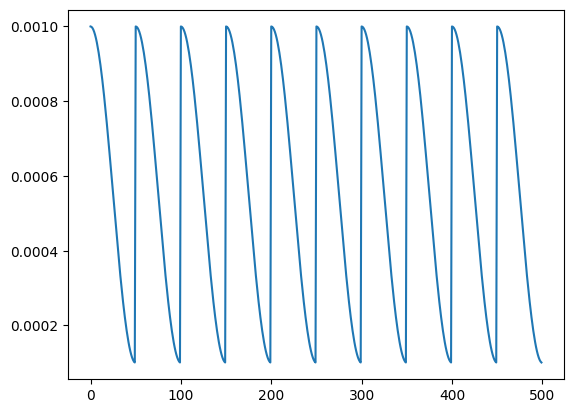

In [36]:
CAWR = lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=50, T_mult=1, eta_min=1e-4)

plot_lr(CAWR, 500)